In [3]:
import networkx as nx
import community as community_louvain
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [11]:
df = pd.read_csv("nutrients.csv", header=None, names=["Source", "Target"])

In [12]:
G = nx.from_pandas_edgelist(df, source="Source", target="Target")

In [18]:
degrees = G.degree()
nodes = G.nodes()

print(G.nodes(data = True))
print(G.edges(data = True))

[('A', {}), ('carrots', {}), ('eggs', {}), ('fatty fish', {}), ('green leafy vegs', {}), ('liver', {}), ('milk', {}), ('tomatoes', {}), ('B12', {}), ('B6', {}), ('asparagus', {}), ('beans', {}), ('kidneys', {}), ('potatoes', {}), ('C', {}), ('pumpkins', {}), ('Ca', {}), ('broccoli', {}), ('cheese', {}), ('Cu', {}), ('nuts', {}), ('whole grains', {}), ('D', {}), ('mushrooms', {}), ('E', {}), ('seeds', {}), ('Mn', {}), ('legumes', {}), ('wheat', {}), ('Se', {}), ('Zn', {}), ('beef', {}), ('riboflavin', {}), ('niacin', {}), ('folates', {}), ('spinach', {}), ('poultry', {}), ('shellfish', {}), ('thiamin', {}), ('veg oils', {}), ('yogurt', {})]
[('A', 'carrots', {}), ('A', 'eggs', {}), ('A', 'fatty fish', {}), ('A', 'green leafy vegs', {}), ('A', 'liver', {}), ('A', 'milk', {}), ('A', 'tomatoes', {}), ('carrots', 'C', {}), ('eggs', 'B12', {}), ('eggs', 'riboflavin', {}), ('fatty fish', 'B6', {}), ('fatty fish', 'D', {}), ('fatty fish', 'B12', {}), ('fatty fish', 'niacin', {}), ('green leafy

In [14]:
degree_centrality = nx.degree_centrality(G) 
print("Degree Centrality:")
for node, score in degree_centrality.items():
    print(f"{node}: {score:.4f}")

Degree Centrality:
A: 0.1750
carrots: 0.0500
eggs: 0.0750
fatty fish: 0.1250
green leafy vegs: 0.1500
liver: 0.1500
milk: 0.1250
tomatoes: 0.1000
B12: 0.1250
B6: 0.2000
asparagus: 0.0500
beans: 0.0750
kidneys: 0.1000
potatoes: 0.0750
C: 0.1250
pumpkins: 0.0250
Ca: 0.1250
broccoli: 0.0500
cheese: 0.0250
Cu: 0.1750
nuts: 0.1250
whole grains: 0.1000
D: 0.0750
mushrooms: 0.0250
E: 0.1000
seeds: 0.0750
Mn: 0.1500
legumes: 0.0500
wheat: 0.0250
Se: 0.0750
Zn: 0.1750
beef: 0.1250
riboflavin: 0.1250
niacin: 0.1250
folates: 0.0750
spinach: 0.0250
poultry: 0.0750
shellfish: 0.0500
thiamin: 0.0250
veg oils: 0.0250
yogurt: 0.0250


In [15]:
eigenvector_centrality = nx.eigenvector_centrality(G)
print("\nEigenvector Centrality:")
for node, score in eigenvector_centrality.items():
    print(f"{node}: {score:.4f}")


Eigenvector Centrality:
A: 0.2204
carrots: 0.0610
eggs: 0.1171
fatty fish: 0.2100
green leafy vegs: 0.1602
liver: 0.2813
milk: 0.1497
tomatoes: 0.0771
B12: 0.1873
B6: 0.3346
asparagus: 0.0866
beans: 0.1932
kidneys: 0.2185
potatoes: 0.1932
C: 0.0719
pumpkins: 0.0150
Ca: 0.0780
broccoli: 0.0313
cheese: 0.0163
Cu: 0.2740
nuts: 0.2131
whole grains: 0.1315
D: 0.0785
mushrooms: 0.0164
E: 0.1010
seeds: 0.0897
Mn: 0.1432
legumes: 0.0619
wheat: 0.0299
Se: 0.1215
Zn: 0.3172
beef: 0.2458
riboflavin: 0.1533
niacin: 0.1857
folates: 0.0802
spinach: 0.0167
poultry: 0.1751
shellfish: 0.0825
thiamin: 0.0274
veg oils: 0.0211
yogurt: 0.0163


In [16]:
partition = community_louvain.best_partition(G)

In [23]:
pos = nx.spring_layout(G)

In [24]:
d = dict(G.degree)

In [25]:
nodesize = [v * 50 for v in d.values()]

In [26]:
cmap = cm.get_cmap("viridis" , max(partition.values()) + 1)

/var/folders/27/tqtm6snx75b8mm_4xljd1c2c0000gn/T/ipykernel_40988/3120344289.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap("viridis" , max(partition.values()) + 1)


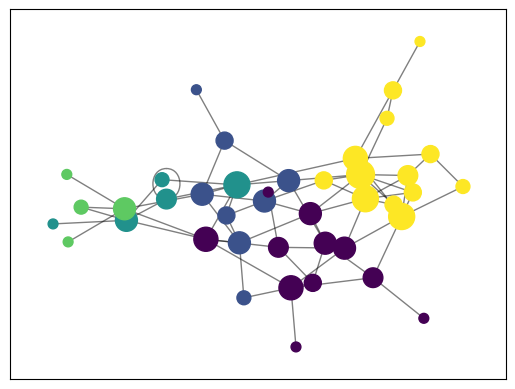

In [31]:
nx.draw_networkx_nodes(G, pos, partition.keys(), node_size=nodesize,cmap=cmap,node_color=list(partition.values()))
nx.draw_networkx_edges(G,pos,alpha=0.5)
plt.show()

##TASK 2

SELECT ?person ?personLabel ?father ?fatherLabel
WHERE {
  ?person wdt:P31 wd:Q5.
  ?person wdt:P27 wd:Q30.
  ?person wdt:P106 wd:Q82955.
  ?person wdt:P22 ?father.
  ?father wdt:P106 wd:Q82955.
  SERVICE wikibase:label { bd:serviceParam wikibase:language "[AUTO_LANGUAGE],en". }
}

SELECT ?person ?personLabel 
WHERE {
  ?person wdt:P31 wd:Q5. # Is a Human
  ?person wdt:P27 wd:Q20. # Lives in Norway
  ?person wdt:P106 wd:Q49757. # Is a Poet
  ?person wdt:P569 ?dateOfBirth # Date of Birth
  FILTER(YEAR(?dateOfBirth) > 1950) # Filter for date of birth after 1950
  SERVICE wikibase:label { bd:serviceParam wikibase:language "[AUTO_LANGUAGE],en". }
}

SELECT (COUNT(*) AS ?count)
WHERE {
   ?item wdt:P31 wd:Q3918 # Is a University
}

SELECT *
WHERE {
  ?person wdt:P31 wd:Q5. # Is a human
  ?person wdt:P27 wd:Q20. # Lives in Norway
  ?person wdt:P106 wd:Q49757. # Is a poet
  ?person wdt:P106 wd:Q82955. # Is a politician
  ?person wdt:P19 ?birthplace. # Place of birth
  ?birthplace wdt:P625 ?geo # Coordiante location
  SERVICE wikibase:label { bd:serviceParam wikibase:language "[AUTO_LANGUAGE],en". }
}

SELECT DISTINCT ?person ?personLabel ?nobelPrizeLabel ?birthplace ?geo
WHERE {
  ?person wdt:P31 wd:Q5. # Is human
  ?person wdt:P166 ?nobelPrize. # Is award
  ?person wdt:P19 ?birthplace. # Place of birth
  ?birthplace wdt:P625 ?geo. # Place of birth coordinate
  ?nobelPrize wdt:P279 wd:Q7191. # Is Nobel price          
  SERVICE wikibase:label { bd:serviceParam wikibase:language "[AUTO_LANGUAGE],en". }
}